<h1 style="text-align:center;">TELECOM CHURN PREDICTION (SYRIA TEL) </h1>


<h1 style="text-align:center;">BUSINESS UNDERSTANDING  </h1>


Churn is a one of the biggest problem in the telecom industry with Telco companies aiming to attract new customers and at the same time avoid contract terminations to grow their revenue-generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example, better price offers more interesting packages, bad service experiences, or changes in customers’ personal situations. Prediction models can be utilised to predict churn on an individual customer basis and take countermeasures such as discounts, special offers, or other gratifications to keep their customers.This project aims to develop a predictive model to predict customer churn for SyriaTel.The primary objective is to build a predictive model to identify customers likely to churn and recommend actionable insights to retain them. SyriaTel's stakeholders especially the company's management and marketing team stand to learn and benefit more from the project. Other companies within the telecommunications industry are also in place to learn and benefit.

<h1 style="text-align:center;">DATA UNDERSTANDING</h1>

The dataset originates from SyriaTel Telecommunication company and was obtained from Kaggle. This part aims to give meaning to the data through loading the provided dataset, explore the dataset structure, including data types, missing values, and basic statistics.
Visualize key variables to understand distributions and relationships.We dive into data preparation to describe and understand the data better.

In [33]:
import pandas as pd

#Load the dataset to examine its contents
data = pd.read_csv("Syria_Telcommunication_Customer_Churn_Data.CSV")

# Display general information about the dataset
dataset_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "missing_values": data.isnull().sum().to_dict(),
    "sample_data": data.head().to_dict(orient='records')
}

dataset_info

{'shape': (3333, 21),
 'columns': ['state',
  'account length',
  'area code',
  'phone number',
  'international plan',
  'voice mail plan',
  'number vmail messages',
  'total day minutes',
  'total day calls',
  'total day charge',
  'total eve minutes',
  'total eve calls',
  'total eve charge',
  'total night minutes',
  'total night calls',
  'total night charge',
  'total intl minutes',
  'total intl calls',
  'total intl charge',
  'customer service calls',
  'churn'],
 'missing_values': {'state': 0,
  'account length': 0,
  'area code': 0,
  'phone number': 0,
  'international plan': 0,
  'voice mail plan': 0,
  'number vmail messages': 0,
  'total day minutes': 0,
  'total day calls': 0,
  'total day charge': 0,
  'total eve minutes': 0,
  'total eve calls': 0,
  'total eve charge': 0,
  'total night minutes': 0,
  'total night calls': 0,
  'total night charge': 0,
  'total intl minutes': 0,
  'total intl calls': 0,
  'total intl charge': 0,
  'customer service calls': 0,
  '

 The data comprises 21 columns and 3333 rows. The columns have various attributes related to customer demographics and churn behavior. The rows correspond to a recorded customer. The dataset encompasses both continuous and categorical variables. The target variable identified is "churn," with the remaining variables serving as predictors. Correlation will be conducted to determine the predictors suitability.

<h1 style="text-align:center;">PREPARATION OF DATA</h1>

Exploratory data analysis (EDA) is performed on the SyriaTel dataset a crucial step to check for patterns and usefull insights for predicting churn. It also promotes describing and understandin the data better. It includes Data Visualization and Correlation Analysis. We also import all necessary libraries.

<h2 style="text-align:center;">Exploratory Data Analysis (EDA)</h2>

In [34]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Display the first few rows of the dataset
data['churn'] = data['churn'].astype(int)
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [36]:
# Check for duplicated rows, no duplicated rows to deal with.
data.duplicated().sum()

0

Further Data exploration analysis

In [37]:
# Data Exploration
# Checking data types, unique values in categorical columns, and summary statistics for numeric columns
# Summary statistics for numeric columns
numeric_summary = data.describe()

# Unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns
categorical_summary = {col: data[col].value_counts().to_dict() for col in categorical_columns}

# Correlation matrix for numeric columns (to identify relationships)
correlation_matrix = data.corr()

# Results
{
    "numeric_summary": numeric_summary,
    "categorical_summary": categorical_summary,
    "correlation_matrix": correlation_matrix
}


{'numeric_summary':        account length    area code  number vmail messages  total day minutes  \
 count     3333.000000  3333.000000            3333.000000        3333.000000   
 mean       101.064806   437.182418               8.099010         179.775098   
 std         39.822106    42.371290              13.688365          54.467389   
 min          1.000000   408.000000               0.000000           0.000000   
 25%         74.000000   408.000000               0.000000         143.700000   
 50%        101.000000   415.000000               0.000000         179.400000   
 75%        127.000000   510.000000              20.000000         216.400000   
 max        243.000000   510.000000              51.000000         350.800000   
 
        total day calls  total day charge  total eve minutes  total eve calls  \
 count      3333.000000       3333.000000        3333.000000      3333.000000   
 mean        100.435644         30.562307         200.980348       100.114311   
 std   

Handle missing values either through deletion, imputation or other means

In [38]:
# Counter Check for missing values

data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

output shows no missing data as previously seen in data undersatnding

To continue with EDA convert the target variable "churn"to integer replacing True with 1 and false = 0. We then check the for the distribution of the target variable. Churn will be used as the dependent variable in this analysis. Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account.

In [39]:
# Check the distribution of the target variable 'Churn'
churn_counts = data['churn'].value_counts()

# Print the counts and percentages of churn
samples_total = len(data)
for churn_status, count in churn_counts.items():
    percentage = (count / samples_total) * 100
    print(f"Churn: {churn_status}, Count: {count}, Percentage: {percentage:.2f}%")
#

Churn: 0, Count: 2850, Percentage: 85.51%
Churn: 1, Count: 483, Percentage: 14.49%


Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.
The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

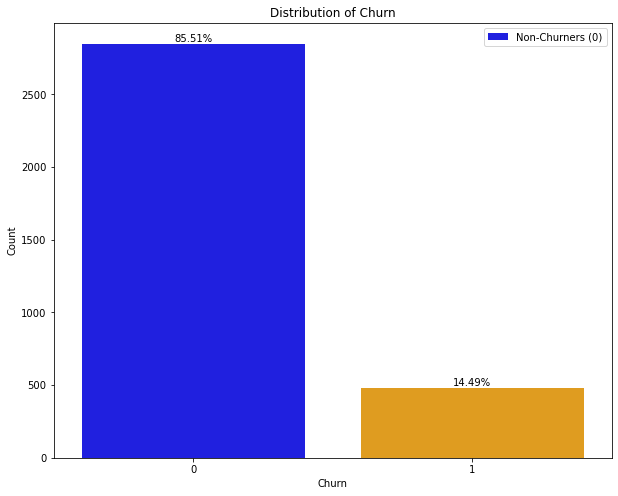

In [40]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 8))
sns.countplot(x='churn', data=data, palette=['blue', 'orange'])

# Calculate and display percentages on the bars
for i, count in enumerate(churn_counts):
    percentage = (count / samples_total) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['Non-Churners (0)', 'Churners (1)'])

plt.show()

Proceed to correlation analysis with churn as the target feature

In [41]:
# Correlation matrix for numeric columns (to identify relationships)
correlation_matrix = data.corr()

# Results
{
    "numeric_summary": numeric_summary,
    "categorical_summary": categorical_summary,
    "correlation_matrix": correlation_matrix
}

{'numeric_summary':        account length    area code  number vmail messages  total day minutes  \
 count     3333.000000  3333.000000            3333.000000        3333.000000   
 mean       101.064806   437.182418               8.099010         179.775098   
 std         39.822106    42.371290              13.688365          54.467389   
 min          1.000000   408.000000               0.000000           0.000000   
 25%         74.000000   408.000000               0.000000         143.700000   
 50%        101.000000   415.000000               0.000000         179.400000   
 75%        127.000000   510.000000              20.000000         216.400000   
 max        243.000000   510.000000              51.000000         350.800000   
 
        total day calls  total day charge  total eve minutes  total eve calls  \
 count      3333.000000       3333.000000        3333.000000      3333.000000   
 mean        100.435644         30.562307         200.980348       100.114311   
 std   

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


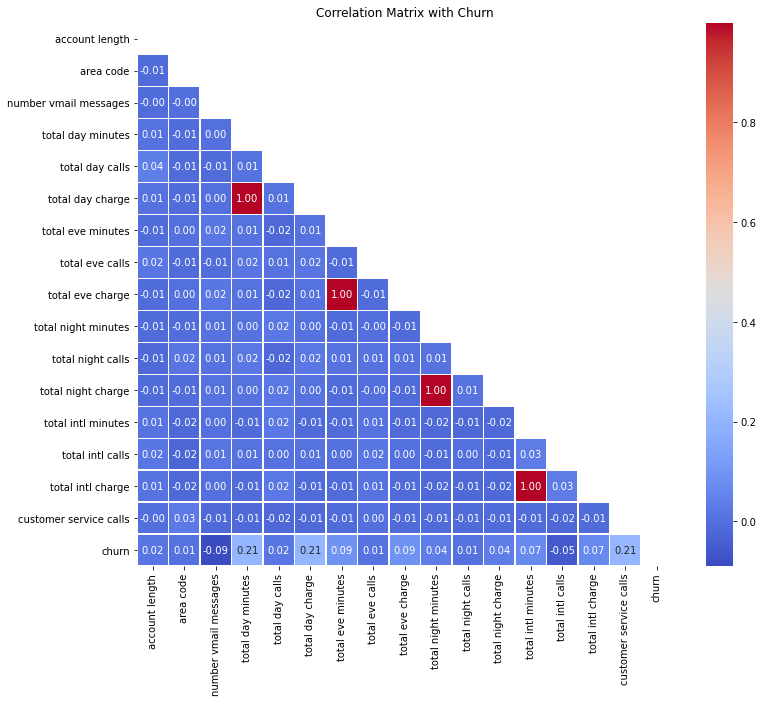

In [42]:
# Explore the relationship between numerical variables and the target variable 'Churn'

# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Add 'churn' to the numerical columns
numerical_columns = numerical_columns.append(pd.Index(['churn']))

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Print correlation coefficients with respect to 'churn'
print(correlation_matrix['churn'].sort_values(ascending=False))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix with Churn')
plt.show()

Feature Selection:
Most of the features are not correlated however some do share a perfect correlation.
Total day charge and total day minutes features are fully positively correlated.
Total eve charge and total eve minutes features are fully positively correlated.
Total night charge and total night minutes features are fully positively correlated.
Total int charge and total int minutes features are fully positively correlated.
It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used

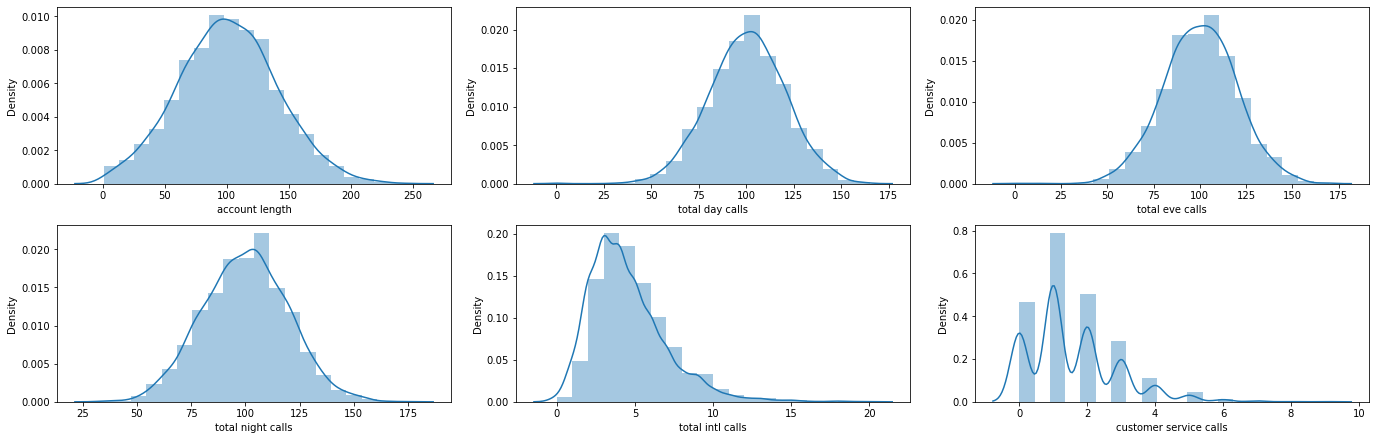

In [43]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(data["account length"],bins=20,ax=ax[0,0]);

sns.distplot(data["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(data["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(data["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(data["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(data["customer service calls"],bins=20,ax=ax[1,2]);

For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.
Customer service calls has a few peaks, which indicates there are a few modes in the population.
This makes sense because customer service calls has to be a integer and not a float number.
The visualization help us to understand the central tendency, spread, and shape of the data distribution. This understanding is crucial for selecting appropriate predictive modeling techniques and interpreting model outputs.

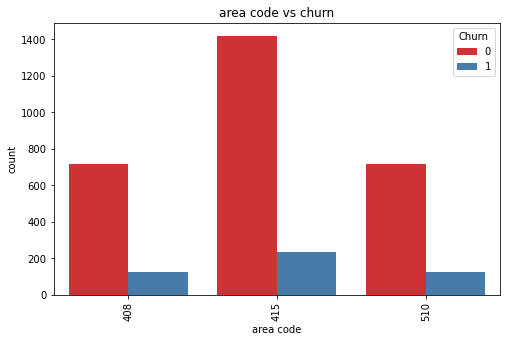

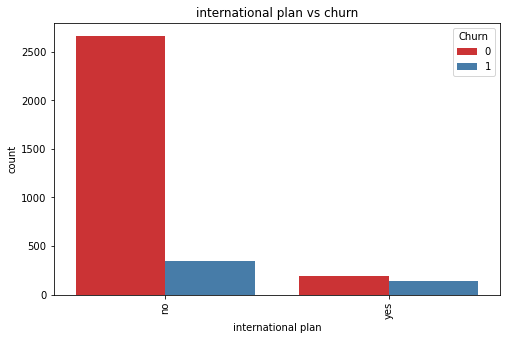

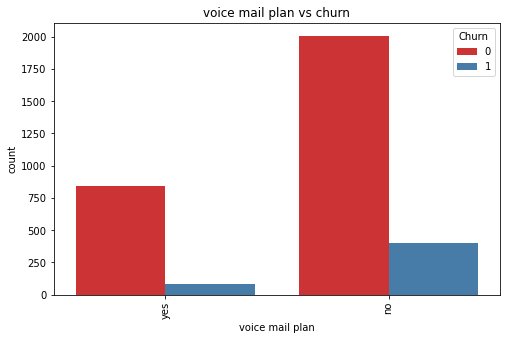

In [44]:
# Explore the relationship between categorical variables and the target variable 'Churn'

# Convert boolean values in 'churn' column to strings
data['churn'] = data['churn'].astype(str)

# Select relevant categorical columns excluding 'churn'
categorical_cols = ['area code', 'international plan', 'voice mail plan']


# Create countplots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='churn', data=data, palette='Set1')
    plt.title(f'{col} vs churn')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.legend(title='Churn', loc='upper right')
    plt.show()



<h3 style="text-align:center;">Data Preprocessing </h3>

To prepare the dataset for classification models like Logistic Regression with 'Churn' as the target variable, we drop Phone Number and State Columns since they are not relevant in our prediction model.

In [45]:
# Drop irrelevant columns
irrelevant_cols = ['state', 'phone number']  # drop Irrelevant columns
data.drop(columns=irrelevant_cols, inplace=True)

Class imbalance as detected earlier hould be addressed as it may result in bias result favouring the majority calss. 
Methods to handle class imbalance may include:
A) Using SMOTE: Synthetic Minority Over-sampling Technique (SMOTE) to address the class imbalance problem by oversampling the minority class (churners) in the training set.
B) Feature Engineering to create two new features:
1. total_minutes: Summing up the total minutes for day, evening, night, and international calls.
2. interaction_minutes_calls: Calculating the interaction between the total day minutes and customer service calls.



In [46]:
# Feature Engineering to handle class imbalance
# To create a new feature 'total_minutes' by summing up all the minutes (day, evening, night, and international)
data['total_minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']

# The interaction between 'total_day_minutes' and 'customer_service_calls'
data['interaction_minutes_calls'] = data['total day minutes'] * data['customer service calls']
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,interaction_minutes_calls
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,717.2,265.1
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,625.2,161.6
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,539.4,0.0
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,564.8,598.8
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,512.0,500.1


Encoding
Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models. Convert categorical variables such as 'area code', 'international plan', and 'voice mail plan' into numerical format. This is necessary because most machine learning algorithms, including Logistic Regression, require numerical inputs. label encoder or hot encoding can be employed.

In [47]:
#categorocal data encoding and data splittting
#Convert categorical variables using one-hot encoding
categorical_cols = ['area code', 'international plan', 'voice mail plan']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into train and test sets
X = data_encoded.drop(columns=['churn'])
y = data_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalization and Standardization
Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1. Scaling the numeric features ensures that all features contribute equally to the model fitting process.


In [48]:
#Features Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Using SMOTE technique to handle class imbalance
#address the class imbalance problem by oversampling the minority class (churners) in the training set.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<h1 style="text-align:center;">START OF MODELLING</h1>

Modeling various machine learning algorithms including the Baseline Logistic Regression Model, the Random Forest Model, and the Tuned Random Forest Model

<h3 style="text-align:center;">1. Baseline Model - Logistic Regression </h3>

In [50]:
# Baseline Model (Interpretable): Logistic Regression
baseline_model = LogisticRegression()

# Fitting the model on the training data
baseline_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [59]:
#Baseline Evaluation
# Generating Predictions using the test set data
baseline_pred = baseline_model.predict(X_test)

# Evaluating Performance metrics of the Model Predictions on the test set data
print("Baseline Model:")
print("Accuracy:", accuracy_score(y_test, baseline_pred))
print("Precision:", precision_score(y_test, baseline_pred, pos_label='1'))
print("Recall:", recall_score(y_test, baseline_pred, pos_label='1'))
print("F1 Score:", f1_score(y_test, baseline_pred, pos_label='1'))


Baseline Model:
Accuracy: 0.8290854572713643
Precision: 0.4644808743169399
Recall: 0.8415841584158416
F1 Score: 0.5985915492957746


Baseline Logistic Regression Model:

##Recall: The recall of the model is approximately 84.16%. Recall, also known as sensitivity, measures the proportion of actual positives that were correctly predicted by the model. In this context, it means that out of all the customers who actually churned, around 84.16% were correctly identified by the model.

##Accuracy: The accuracy of the model is approximately 82.91%. This indicates that the model correctly predicts the churn or non-churn status of around 82.91% of the customers in the test set.

##F1 Score: The F1 score, which is the harmonic mean of precision and recall, is approximately 59.86%. It provides a balance between precision and recall. A higher F1 score indicates better performance, considering both false positives and false negatives.

##Precision: The precision of the model is approximately 46.45%. Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this context, it means that out of all the customers the model predicted to churn, around 46.45% actually churned.
* the baseline model - logistic regression seems to have a poor precision. 



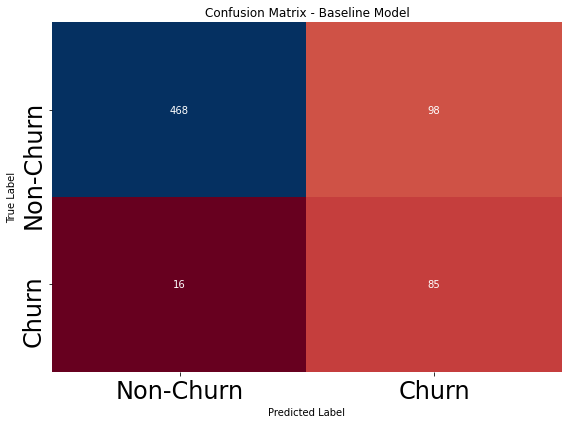

In [66]:
# Vizualization of the confusion matrix
conf_matrix = confusion_matrix(y_test, baseline_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', cbar=False)
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], fontsize=24)
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'] , fontsize=24)

plt.tight_layout()

plt.show()

The confusion matrix provides a tabular representation of the model's predictions versus the actual labels. In this case:

* True Negatives (TN): 468 - The number of customers correctly predicted as non-churners.
* False Positives (FP): 98 - The number of customers incorrectly predicted as churners.
* False Negatives (FN): 16 - The number of customers incorrectly predicted as non-churners.
* True Positives (TP): 85 - The number of customers correctly predicted as churners.

Overall, the model shows relatively high recall, indicating that it's effective at capturing churners. However, the precision is lower, suggesting that there's a significant number of false positive predictions, where customers were predicted to churn but did not. This imbalance between precision and recall could be further addressed and optimized in the model. A more complex Model such as Random Forest may give better performance.

<h3 style="text-align:center;">2. Random Forest Model </h3>

In [67]:
# Complex Model: Random Forest
complex_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
complex_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [69]:
#Evaluation of Random Forest Model
# Generating Predictions using the test set data
complex_pred = complex_model.predict(X_test)

# Evaluating Performance metrics of the Model Predictions on the test set data
print("\nRandom-Forest Model:")
print("Accuracy:", accuracy_score(y_test, complex_pred))
print("Precision:", precision_score(y_test, complex_pred, pos_label='1' ))
print("Recall:", recall_score(y_test, complex_pred, pos_label='1'))
print("F1 Score:", f1_score(y_test, complex_pred, pos_label='1'))



Random-Forest Model:
Accuracy: 0.9610194902548725
Precision: 0.9310344827586207
Recall: 0.801980198019802
F1 Score: 0.8617021276595743


The Random Forest model gives:

* Accuracy: The accuracy of the model is 96.10%. This indicates the proportion of correctly predicted outcomes (both true positives and true negatives) out of the total number of predictions.

* Precision: The precision of the model is 93.10%. Precision represents the proportion of true positive predictions out of all positive predictions (both true positives and false positives). In other words, it measures how precise the model is in predicting the positive class (churn) when it predicts it.

* Recall: The recall of the model is 80.20%. Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive cases (churn) that the model correctly identifies as positive. It indicates the model's ability to capture all positive instances.

* F1 Score: The F1 score, is 86.17%. As earlier stated it is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets.

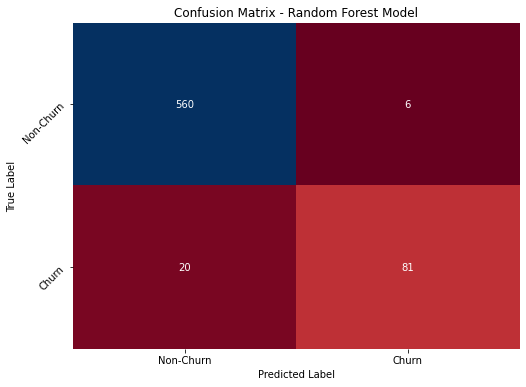

In [71]:
# Visualizing of the confusion matrix
conf_matrix = confusion_matrix(y_test, complex_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', cbar=False)
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], rotation=45)

plt.show()

The Confusion Matrix for Random Forest Model:

* The top-left cell (560) represents the number of true negatives (non-churn customers) that are correctly classified by the model.
* The top-right cell (6) represents the number of false positives (non-churn customers incorrectly classified as churn).
* The bottom-left cell (20) represents the number of false negatives (churn customers incorrectly classified as non-churn).
* The bottom-right cell (81) represents the number of true positives (churn customers) that are correctly classified by the model.

Overall, the Random Forest model demonstrates superior performance across all metrics compared to the Logistic Regression model. It achieves higher accuracy, precision, and F1 score, although it has a slightly lower recall. This suggests that the Random Forest model is more effective than the Baseline Logistic Regression model in accurately identifying churn customers while maintaining a high level of precision.

<h3 style="text-align:center;">3. Decision Tree Model </h3>

In [72]:
# Instantiate 
dt = DecisionTreeClassifier(random_state=1 )

# Fit the model to the training data here
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=1)

In [73]:
# Testing out the model's r2 score on the training data overall
dt_train_score = dt.score(X_train, y_train)
dt_train_score

1.0

In [74]:
# Assign the cross validated score to dt_cv
dt_cv = cross_val_score(dt, X_train, y_train, cv=5)
dt_cv

array([0.92696629, 0.90994371, 0.89493433, 0.91369606, 0.94559099])

In [75]:
# Create a second decision tree model
dt_tuned = DecisionTreeRegressor(random_state=1, max_depth=5 )

# Fit the new model on the training data
dt_tuned.fit(X_train_resampled, y_train_resampled)

# Testing out the model's r2 score on the training data overall
dt_tuned_train_score = dt_tuned.score(X_train_resampled, y_train_resampled)
dt_tuned_train_score

0.69065226041083

In [76]:
dt_tuned_cv = cross_val_score(dt_tuned, X_train, y_train, cv=5)
dt_tuned_cv

array([0.61647043, 0.6020809 , 0.48463522, 0.54584535, 0.64479632])

In [77]:
print("Train score for dt:      ", dt_train_score)
print("Train score for dt_tuned:", dt_tuned_train_score)
print()
print("CV scores for dt:      ", dt_cv)
print("CV scores for dt_tuned:", dt_tuned_cv)

Train score for dt:       1.0
Train score for dt_tuned: 0.69065226041083

CV scores for dt:       [0.92696629 0.90994371 0.89493433 0.91369606 0.94559099]
CV scores for dt_tuned: [0.61647043 0.6020809  0.48463522 0.54584535 0.64479632]


In [78]:
# Generating Predictions using the test set data
dt_pred = dt.predict(X_test)

# Evaluating Performance metrics of the Model Predictions on the test set data
print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, pos_label='1' ))
print("Recall:", recall_score(y_test, dt_pred, pos_label='1'))
print("F1 Score:", f1_score(y_test, dt_pred, pos_label='1'))


Decision Tree Model:
Accuracy: 0.9145427286356822
Precision: 0.6964285714285714
Recall: 0.7722772277227723
F1 Score: 0.7323943661971831


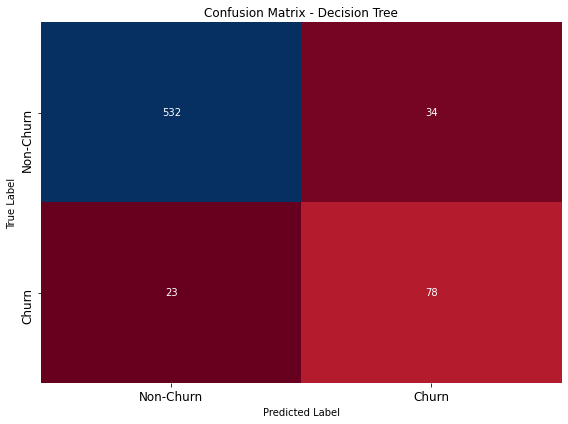

In [79]:
# Vizualization of the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'] , fontsize=12)

plt.tight_layout()

plt.show()

The Confusion Matrix for Decision Tree Model:

* The top-left cell (532) represents the number of true negatives (non-churn customers) that are correctly classified by the model.
* The top-right cell (34) represents the number of false positives (non-churn customers incorrectly classified as churn).
* The bottom-left cell (23) represents the number of false negatives (churn customers incorrectly classified as non-churn).
* The bottom-right cell (78) represents the number of true positives (churn customers) that are correctly classified by the model.

Overall, the Decision tree model demonstrates superior performance across all metrics compared to the Logistic Regression model. It achieves higher accuracy, precision, and F1 score, although it has a slightly lower recall. This suggests that the Decision tree model is more effective than the Baseline Logistic Regression model in accurately identifying churn customers while maintaining a high level of precision.

Baseline Model (Logistic Regression) ROC AUC Score: 0.8761
Decision Tree ROC AUC Score: 0.8561
Random Forest ROC AUC Score: 0.9249


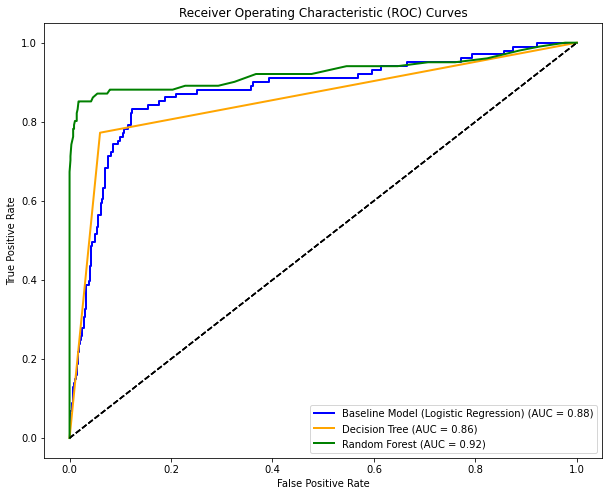

In [80]:
# Define models and their labels
models = [baseline_model, dt, complex_model]
model_labels = ['Baseline Model (Logistic Regression)', 'Decision Tree', 'Random Forest']

# Convert y_test to integer values
y_test_int = y_test.astype(int)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Calculate ROC curves and AUC scores for each model
for model, label, color in zip(models, model_labels, ['blue', 'orange', 'green']):
    # Generate model predictions
    y_score = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_int, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(label, roc_auc), color=color)

    # Plot the ROC curve for random guessing
    # Random guessing
    random_guess_fpr = [0, 1]
    random_guess_tpr = [0, 1]
    plt.plot(random_guess_fpr, random_guess_tpr, linestyle='--', color='black')


    # Print ROC AUC score
    print(f'{label} ROC AUC Score: {roc_auc:.4f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
